In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
import os
import io
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#import tflite_runtime.interpreter as tflite
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model

In [100]:
img_height = 256
img_width = 256
class_folder_paths = ['C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/'+x for x in os.listdir('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/')]
class_folder_paths

['C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Afghan',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/African Wild Dog',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Airedale',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Hairless',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Spaniel',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basenji',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basset',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Beagle',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bearded Collie',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bermaise',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bichon Frise',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Blenheim',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bloodhound',
 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/B

In [64]:
for class_folder_path in class_folder_paths:
    print('{0}:'.format(class_folder_path), ' ', len(os.listdir(class_folder_path)))

C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Afghan:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/African Wild Dog:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Airedale:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Hairless:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/American Spaniel:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basenji:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Basset:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Beagle:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bearded Collie:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bermaise:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bichon Frise:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Blenheim:   10
C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/Bloodhound:   10
C:/Users/krzys/Desktop/Polibuda/se

In [65]:
TRAIN_DIR = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/train/'
VAL_DIR = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/'

In [75]:
labels = train_generator.class_indices
class_mapping = dict((v,k) for k,v in labels.items())
class_mapping

{0: 'Afghan',
 1: 'African Wild Dog',
 2: 'Airedale',
 3: 'American Hairless',
 4: 'American Spaniel',
 5: 'Basenji',
 6: 'Basset',
 7: 'Beagle',
 8: 'Bearded Collie',
 9: 'Bermaise',
 10: 'Bichon Frise',
 11: 'Blenheim',
 12: 'Bloodhound',
 13: 'Bluetick',
 14: 'Border Collie',
 15: 'Borzoi',
 16: 'Boston Terrier',
 17: 'Boxer',
 18: 'Bull Mastiff',
 19: 'Bull Terrier',
 20: 'Bulldog',
 21: 'Cairn',
 22: 'Chihuahua',
 23: 'Chinese Crested',
 24: 'Chow',
 25: 'Clumber',
 26: 'Cockapoo',
 27: 'Cocker',
 28: 'Collie',
 29: 'Corgi',
 30: 'Coyote',
 31: 'Dalmation',
 32: 'Dhole',
 33: 'Dingo',
 34: 'Doberman',
 35: 'Elk Hound',
 36: 'French Bulldog',
 37: 'German Sheperd',
 38: 'Golden Retriever',
 39: 'Great Dane',
 40: 'Great Perenees',
 41: 'Greyhound',
 42: 'Groenendael',
 43: 'Irish Spaniel',
 44: 'Irish Wolfhound',
 45: 'Japanese Spaniel',
 46: 'Komondor',
 47: 'Labradoodle',
 48: 'Labrador',
 49: 'Lhasa',
 50: 'Malinois',
 51: 'Maltese',
 52: 'Mex Hairless',
 53: 'Newfoundland',
 54

In [69]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.build(((None, 224, 224, 3)))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


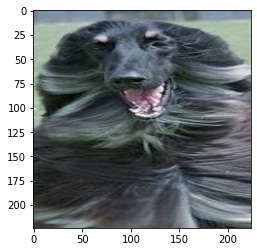

In [74]:
#inp1 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Afghan/01.jpg') #Afghan
#inp2 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Boxer/01.jpg') #Boxer
#inp3 = cv2.imread('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/valid/Bull Mastiff/01.jpg')
#inputs = [inp1, inp2, inp3]
#inputs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in inputs]
#plt.imshow(inputs[0])

In [79]:
data_dir = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/train/'
val_dir = 'C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/archive/test/'

In [91]:
#Tworzenie zbiorów obrazów do treningu i walidacji
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir)

Found 7946 files belonging to 70 classes.
Found 700 files belonging to 70 classes.


In [89]:
#Pokazanie części obrazów, aby sprawdzić czy się załadowały
plt.figure(figsize=(100, 100))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_mapping)
    plt.axis("off")

In [93]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 256, 3)
(32,)


In [94]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [96]:
normalization_layer = layers.Rescaling(1./255)


In [97]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [101]:
num_classes = len(class_mapping)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [105]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [197]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2_input (InputLay  [(None, 256, 256, 3)]    0         
 er)                                                             
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0     

In [108]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
249/249 [==============================] - 227s 907ms/step - loss: 4.1198 - accuracy: 0.0373 - val_loss: 3.9007 - val_accuracy: 0.0543

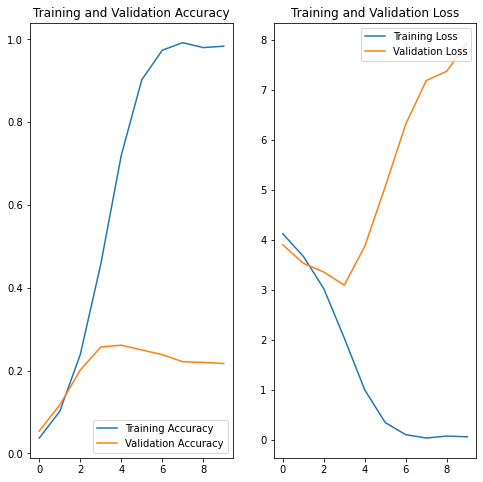

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


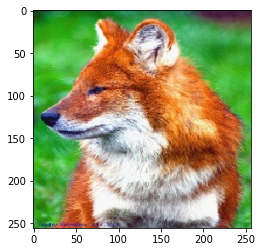

In [246]:
img_path = "D:/PENDRIVE/CV/dog5.jpg"
img = image.load_img(img_path, target_size=(256, 256))
plt.imshow(img)
plt.show()

In [217]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

In [247]:
#img = tf.keras.utils.load_img(

#    sunflower_path, target_size=(img_height, img_width))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = modelmodel.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_mapping[np.argmax(score)], 100 * np.max(score))
)
#print(decode_predictions(predictions, top=3)[0])

This image most likely belongs to Dhole with a 100.00 percent confidence.


In [220]:
#model = tf.keras.applications.resnet50.ResNet50()
#model = first_model
predictions = model.predict(img_preprocessed)

In [213]:
print(decode_predictions(predictions, top=3)[0])

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 70)

In [212]:
print(predictions)

[[0.01424756 0.01434243 0.01424494 0.01419811 0.01415562 0.01439587
  0.01431821 0.01425583 0.01432656 0.01441708 0.01431321 0.01430551
  0.01446775 0.0142621  0.01431261 0.01416312 0.01424423 0.0142956
  0.01437624 0.01418139 0.01422968 0.01422747 0.01441212 0.01417993
  0.01419716 0.01439773 0.01418689 0.01426583 0.01416699 0.01442998
  0.01419378 0.01435851 0.01423814 0.01432244 0.01435048 0.01426188
  0.01421596 0.01434772 0.01422517 0.01432604 0.01430691 0.01423004
  0.01424786 0.01430236 0.0142754  0.01423343 0.01426638 0.01425617
  0.01428431 0.01429659 0.01439796 0.01422972 0.01420882 0.01440138
  0.01419575 0.01418836 0.0143798  0.01428854 0.01434841 0.01424428
  0.01433734 0.01435934 0.0143655  0.01441611 0.0144079  0.01423133
  0.01423263 0.01427699 0.01416268 0.01426993]]


In [187]:
first_model = model

In [203]:
base_model = model
# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 7 classes
predictions = Dense(70, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [233]:
modelmodel = tf.keras.models.load_model('C:/Users/krzys/Desktop/Polibuda/sem. 6/BIAI/model')



